# Chapter 3 Unsupervised Learning and Preprocessing

# Preprocessing and Scaling

In [1]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_scaling()
plt.suptitle("scaling_data");

# Applying Data Transformations

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
MinMaxScaler(copy=True, feature_range=(0, 1))
# don't print using scientific notation
np.set_printoptions(suppress=True, precision=2)
# transform data
X_train_scaled = scaler.transform(X_train)
# print data set properties before and after scaling
print("transformed shape: %s" % (X_train_scaled.shape,))
print("per-feature minimum before scaling:\n %s" % X_train.min(axis=0))
print("per-feature maximum before scaling:\n %s" % X_train.max(axis=0))
print("per-feature minimum after scaling:\n %s" % X_train_scaled.min(axis=0))
print("per-feature maximum after scaling:\n %s" % X_train_scaled.max(axis=0))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.98   9.71  43.79 143.5    0.05   0.02   0.     0.     0.11   0.05
   0.12   0.36   0.76   6.8    0.     0.     0.     0.     0.01   0.
   7.93  12.02  50.41 185.2    0.07   0.03   0.     0.     0.16   0.06]
per-feature maximum before scaling:
 [  28.11   39.28  188.5  2501.      0.16    0.29    0.43    0.2     0.3
    0.1     2.87    4.88   21.98  542.2     0.03    0.14    0.4     0.05
    0.06    0.03   36.04   49.54  251.2  4254.      0.22    0.94    1.17
    0.29    0.58    0.15]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [4]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling: %s" % X_test_scaled.min(axis=0))
print("per-feature maximum after scaling: %s" % X_test_scaled.max(axis=0))

per-feature minimum after scaling: [ 0.03  0.02  0.03  0.01  0.14  0.04  0.    0.    0.15 -0.01 -0.    0.01
  0.    0.    0.04  0.01  0.    0.   -0.03  0.01  0.03  0.06  0.02  0.01
  0.11  0.03  0.    0.   -0.   -0.  ]
per-feature maximum after scaling: [0.96 0.82 0.96 0.89 0.81 1.22 0.88 0.93 0.93 1.04 0.43 0.5  0.44 0.28
 0.49 0.74 0.77 0.63 1.34 0.39 0.9  0.79 0.85 0.74 0.92 1.13 1.07 0.92
 1.21 1.63]


# Scaling training and test data the same way

Text(0.5,1,'improperly scaled data')

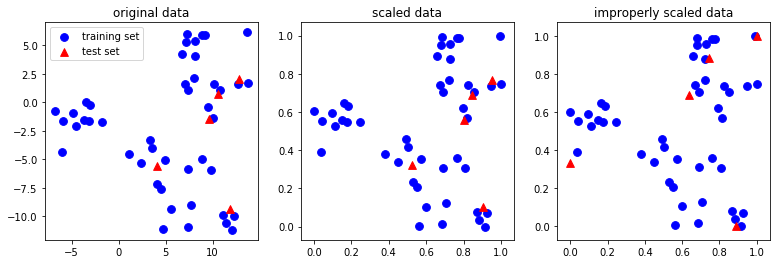

In [5]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test set
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test set
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
 c='b', label="training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
 c='r', label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("original data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c='b', label="training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
 c='r', label="test set", s=60)
axes[1].set_title("scaled data")
# rescale the test set separately, so that test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c='b', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
 c='r', label="test set", s=60)
axes[2].set_title("improperly scaled data")

# The effect of preprocessing on supervised learning

In [6]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.9440559440559441


In [7]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
svm.score(X_test_scaled, y_test)
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
svm.score(X_test_scaled, y_test)

0.958041958041958

In [8]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
svm.score(X_test_scaled, y_test)

0.958041958041958

# Dimensionality Reduction, Feature Extraction and Manifold Learning
# Principal Component Analysis (PCA)

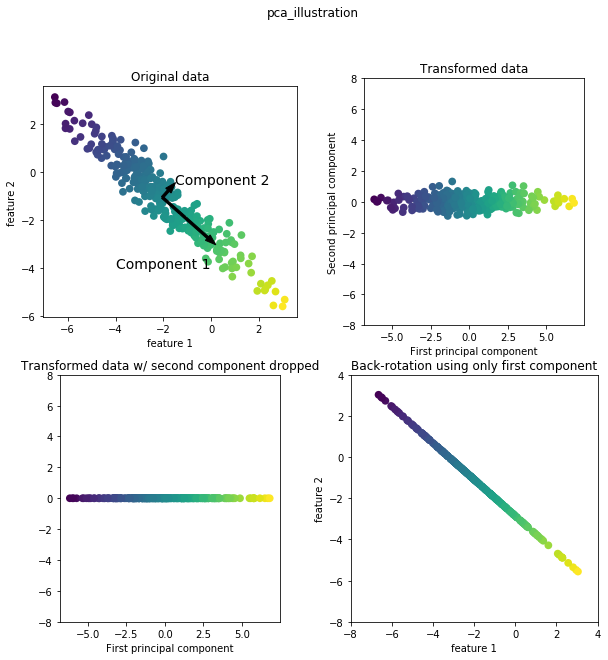

In [9]:
mglearn.plots.plot_pca_illustration()
plt.suptitle("pca_illustration");

# Applying PCA to the cancer dataset for visualization

Text(0.5,0.98,'cancer_histograms')

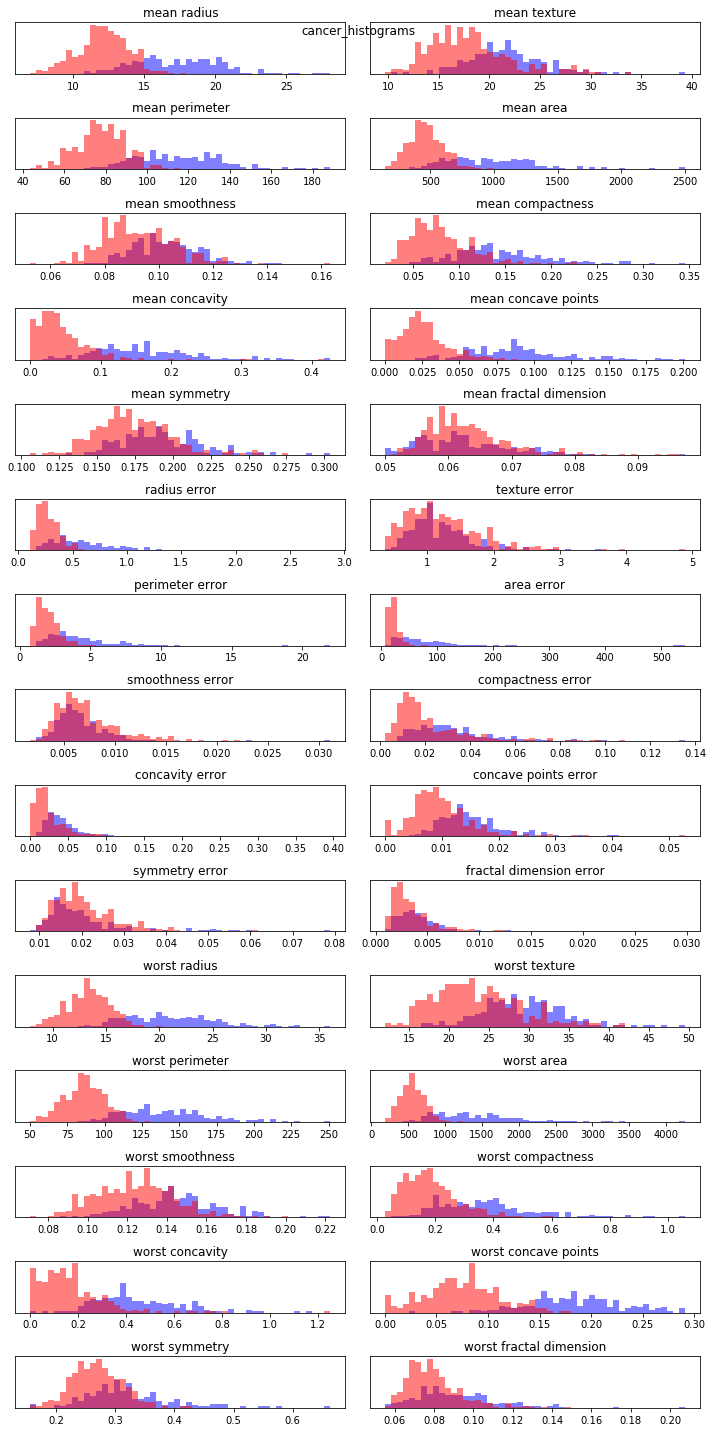

In [10]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.5)
 ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
fig.tight_layout()
plt.suptitle("cancer_histograms")

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [12]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: %s" % str(X_scaled.shape))
print("Reduced shape: %s" % str(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0,0.5,'Second principal component')

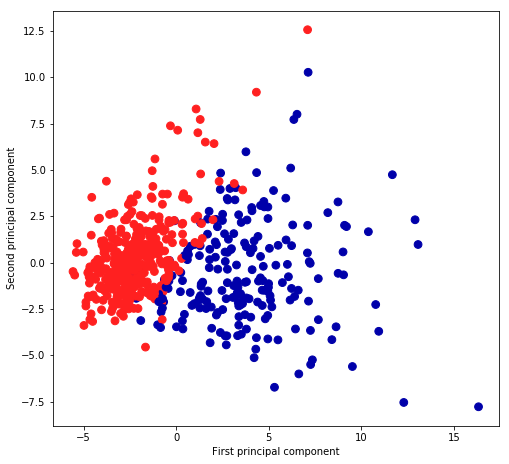

In [13]:
# plot fist vs second principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap=mglearn.tools.cm, s=60)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [14]:
pca.components_.shape

(2, 30)

In [15]:
print(pca.components_)

[[ 0.22  0.1   0.23  0.22  0.14  0.24  0.26  0.26  0.14  0.06  0.21  0.02
   0.21  0.2   0.01  0.17  0.15  0.18  0.04  0.1   0.23  0.1   0.24  0.22
   0.13  0.21  0.23  0.25  0.12  0.13]
 [-0.23 -0.06 -0.22 -0.23  0.19  0.15  0.06 -0.03  0.19  0.37 -0.11  0.09
  -0.09 -0.15  0.2   0.23  0.2   0.13  0.18  0.28 -0.22 -0.05 -0.2  -0.22
   0.17  0.14  0.1  -0.01  0.14  0.28]]


Text(0.5,0.98,'pca_components_cancer')

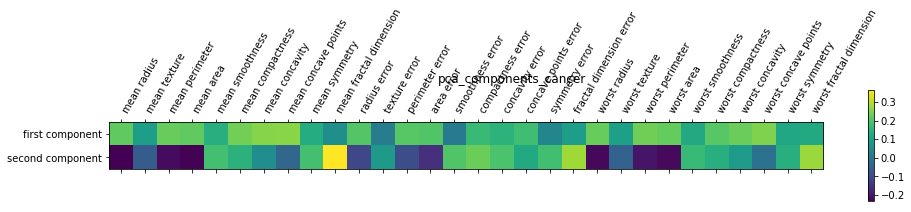

In [16]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
 cancer.feature_names, rotation=60, ha='left');
plt.suptitle("pca_components_cancer")

# Eigenfaces for feature extraction

Text(0.5,0.98,'some_faces')

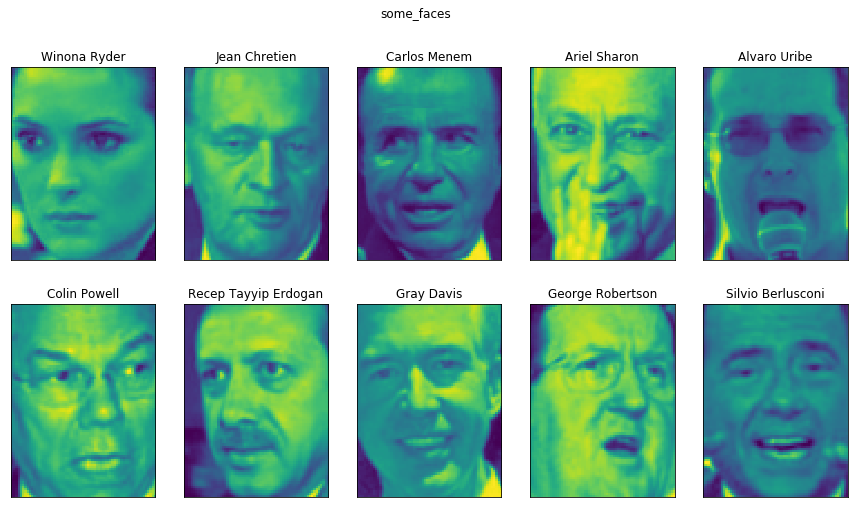

In [17]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

In [18]:
print(people.images.shape)
print(len(people.target_names))

(3023, 87, 65)
62


In [19]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [20]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
 X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

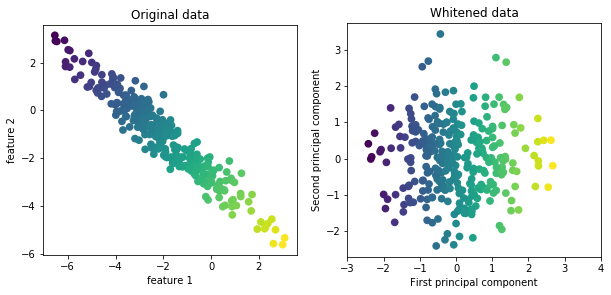

In [22]:
mglearn.plots.plot_pca_whitening()

In [23]:
pca = PCA(n_components=100, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(1547, 100)


In [24]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.31007751937984496

In [25]:
pca.components_.shape

(100, 5655)

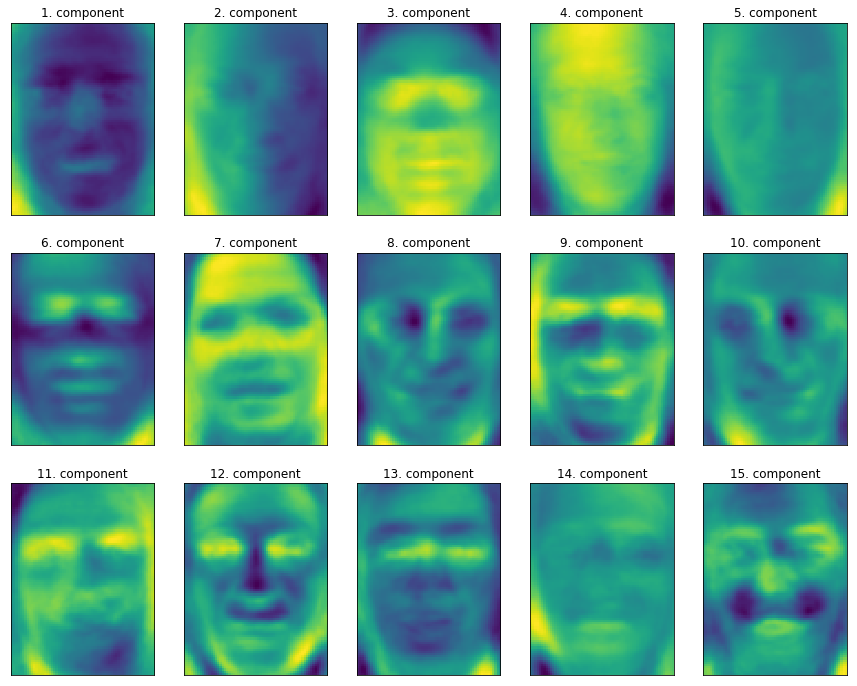

In [26]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                      subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("pca_face_components")
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("%d. component" % (i + 1))

In [68]:
plt.rc('text', usetex=False) # THIS SHOULD NOT SHOW IN THE BOOK! it's needed for the figure above

# Non-Negative Matrix Factorization (NMF)

Text(0.5,0.98,'nmf_illustration')

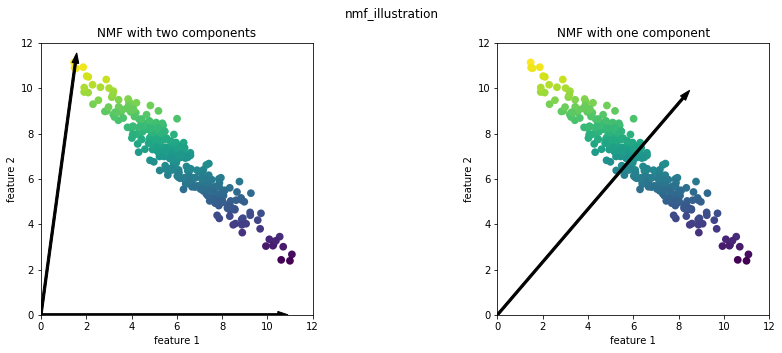

In [27]:
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_nmf_illustration()
plt.suptitle("nmf_illustration")

# Manifold Learning with t-SNE

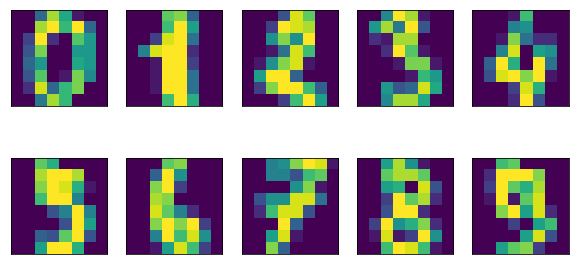

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
 ax.imshow(img)

Text(0,0.5,'second principal component')

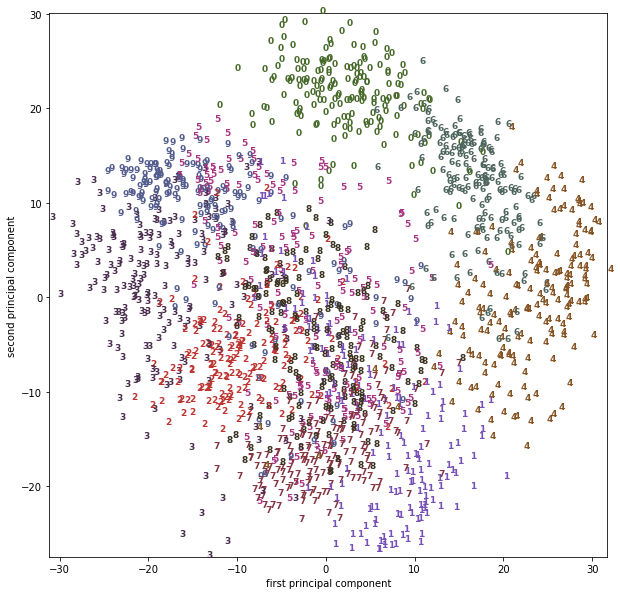

In [61]:
import numpy as np
from sklearn.decomposition import PCA
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first principal component")
plt.ylabel("second principal component")

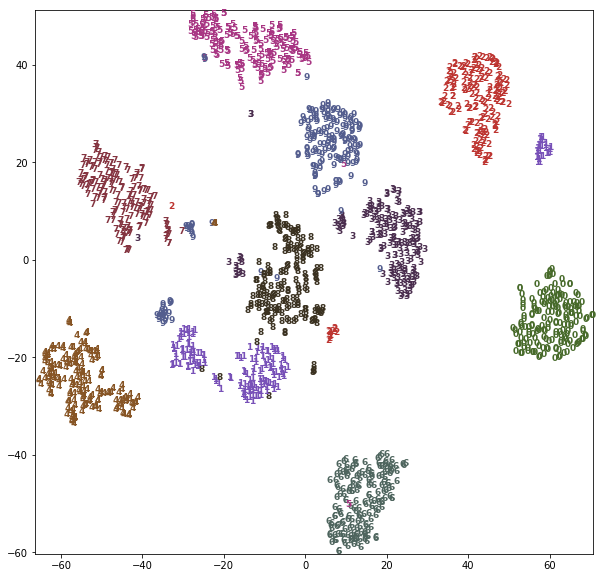

In [62]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method:
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
          color = colors[digits.target[i]],
          fontdict={'weight': 'bold', 'size': 9})

# Clustering
# k-Means clustering

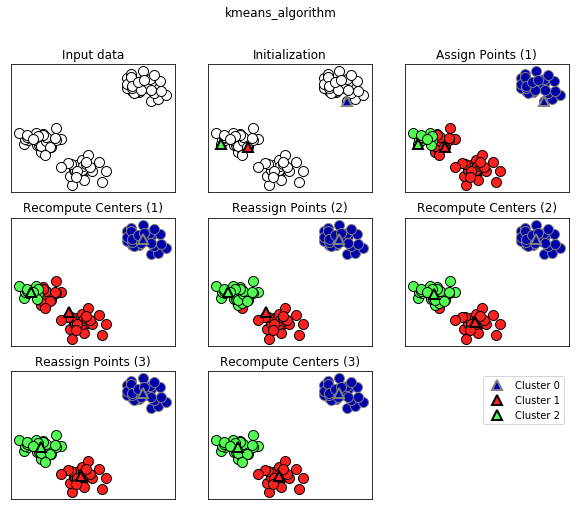

In [17]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()
plt.suptitle("kmeans_algorithm");

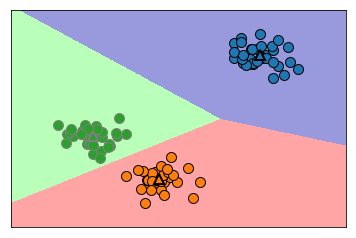

In [18]:
mglearn.plots.plot_kmeans_boundaries()

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
 n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
 verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
print(kmeans.labels_)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [22]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


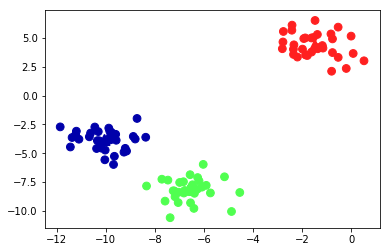

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=mglearn.cm3, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', s=100, linewidth=2, c=[0, 1, 2], cmap=mglearn.cm3)

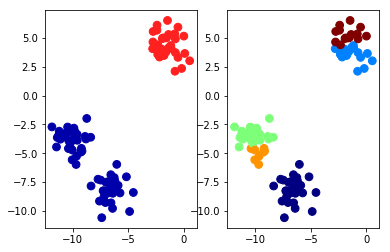

In [24]:
fig, axes = plt.subplots(1, 2)
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
axes[0].scatter(X[:, 0], X[:, 1], c=assignments, cmap=mglearn.cm2, s=60)
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
axes[1].scatter(X[:, 0], X[:, 1], c=assignments, cmap='jet', s=60);

# Failure cases of k-Means

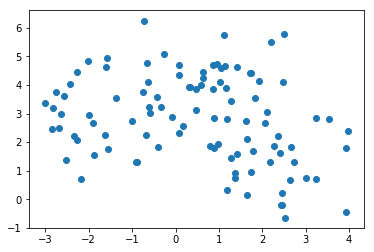

In [25]:
X, y = make_blobs(random_state=0)
plt.scatter(X[:, 0], X[:, 1]);

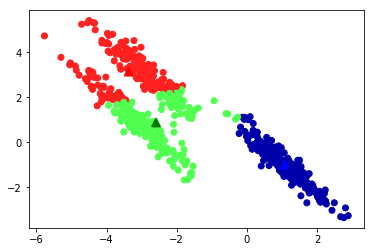

In [27]:
import numpy as np
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be streched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=['b', 'r', 'g'], s=60, linewidth=2);

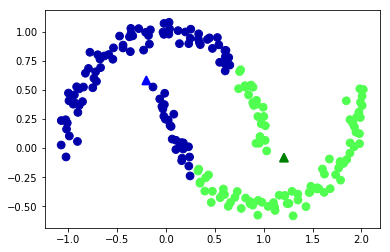

In [28]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=['b', 'g'], s=60, linewidth=2);

[7 1 6 9 1 4 7 8 7 8 0 3 1 8 0 7 2 3 2 0 4 8 5 8 5 6 1 4 6 5 7 5 8 6 2 4 3
 7 9 6 3 0 2 6 1 5 7 0 6 8 0 3 4 9 8 2 2 8 2 5 3 9 1 7 8 9 5 1 5 9 3 9 3 6
 8 9 6 7 2 3 4 5 3 4 6 5 7 5 3 4 2 7 4 0 4 1 1 3 9 6 8 4 5 7 9 6 9 0 1 2 0
 5 5 9 7 1 2 4 3 7 7 0 6 5 6 0 7 6 8 4 7 0 9 3 8 1 8 9 4 7 6 6 2 5 0 7 6 8
 2 6 3 1 7 2 3 5 8 3 2 2 6 8 2 1 3 1 2 3 1 8 2 9 9 0 6 8 4 0 0 2 1 9 4 1 4
 2 5 8 9 0 9 2 7 7 6 0 4 6 5 1]


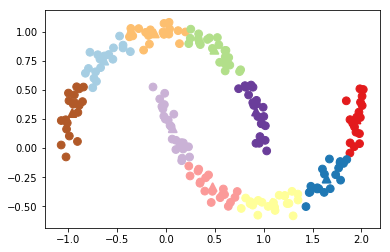

In [30]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=range(kmeans.n_clusters), s=60, linewidth=2, cmap='Paired')
print(y_pred)

In [32]:
distance_features = kmeans.transform(X)
print(distance_features.shape)
print(distance_features)

(200, 10)
[[1.46553151 1.13956805 0.45416272 ... 0.23340263 1.02576102 1.78820579]
 [2.51721597 0.1199124  1.66005101 ... 0.98271691 0.53925926 2.66446252]
 [0.77354687 1.74914157 0.7688191  ... 0.94399739 1.3332387  0.93673651]
 ...
 [1.10631579 1.48991975 0.90824644 ... 0.81205971 1.02075656 1.17433285]
 [0.79790385 1.98056306 0.40648312 ... 1.05774337 1.76193744 1.29279485]
 [2.4536383  0.04506731 1.55050675 ... 0.88166689 0.58824958 2.63174223]]


# Agglomerative Clustering

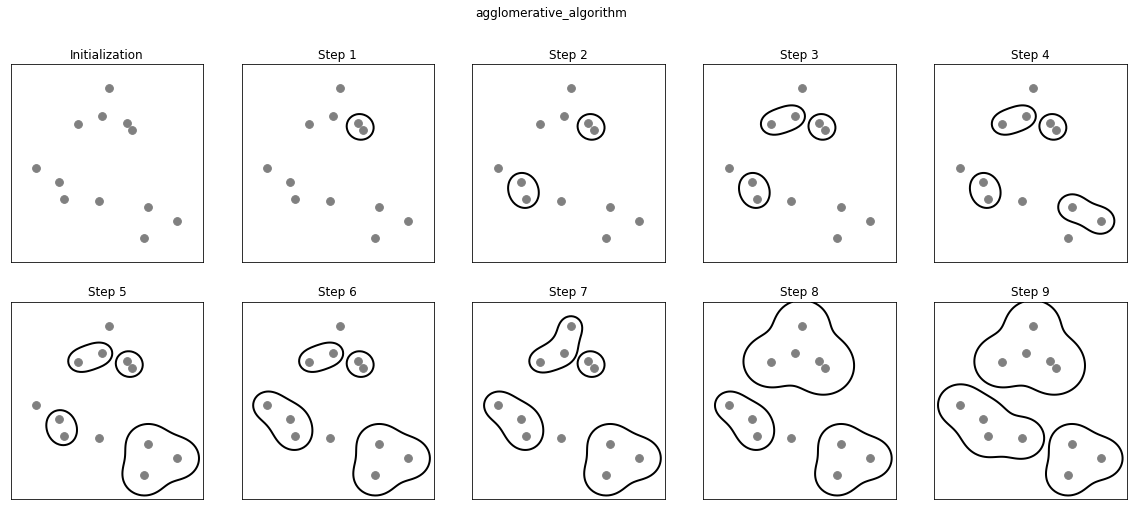

In [33]:
mglearn.plots.plot_agglomerative_algorithm()
plt.suptitle("agglomerative_algorithm");

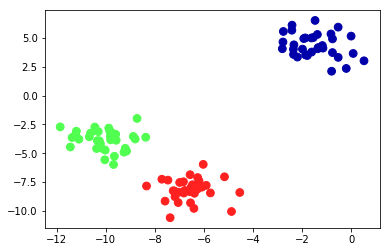

In [34]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=assignment, cmap=mglearn.cm3, s=60)

# Hierarchical Clustering and Dendrograms

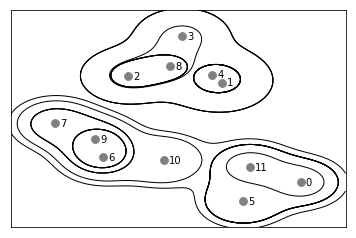

In [35]:
mglearn.plots.plot_agglomerative()

Text(0.5,1,'dendrogram')

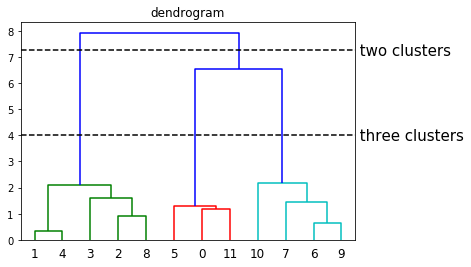

In [36]:
# import the dendrogram function and the ward clustering function from scipy
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# apply the ward clustering to the data array X
# The scipy ward function returns an array that specifies the distances bridged when performing agglomerative clustering
linkage_array = ward(X)
# now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array);
# mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', verticalalignment='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', verticalalignment='center', fontdict={'size': 15})
plt.title("dendrogram")

# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

min_samples: 2 eps: 1.000000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 2 eps: 1.500000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 2 eps: 2.000000 cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

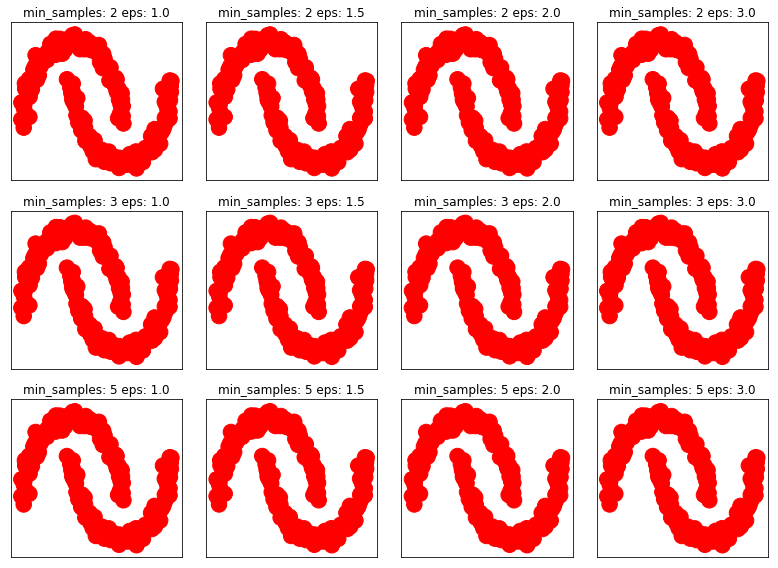

In [49]:
fig, axes = plt.subplots(3, 4, figsize=(11, 8), subplot_kw={'xticks': (), 'yticks': ()})
# Plot clusters as red, green and blue, and outliers (-1) as white
colors = np.array(['r', 'g', 'b', 'w'])
# iterate over settings of min_samples and eps
for i, min_samples in enumerate([2, 3, 5]):
    for j, eps in enumerate([1, 1.5, 2, 3]):
        # instantiate DBSCAN with a particular setting
        dbscan = DBSCAN(min_samples=min_samples, eps=eps)
        # get cluster assignments
        clusters = dbscan.fit_predict(X)
        print("min_samples: %d eps: %f cluster: %s" % (min_samples, eps, clusters))
        # vizualize core samples and clusters.
        sizes = 60 * np.ones(X.shape[0])
        # size is given by whether something is a core sample
        sizes[dbscan.core_sample_indices_] *= 4
        axes[i, j].scatter(X[:, 0], X[:, 1], c=colors[clusters], s=sizes)
        axes[i, j].set_title("min_samples: %d eps: %.1f" % (min_samples, eps))
fig.tight_layout()

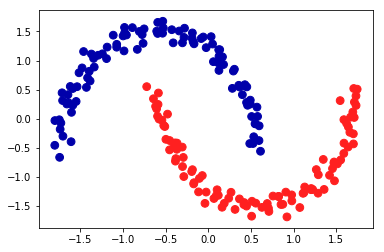

In [52]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()

clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)

# Comparing and evaluating clustering algorithms
# Evaluating clustering with ground truth

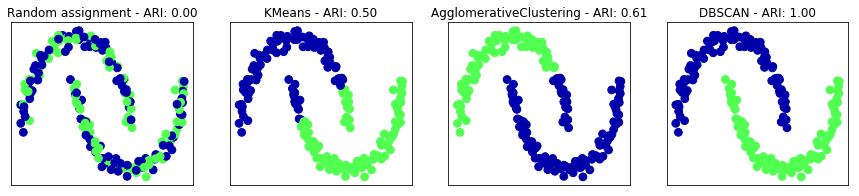

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
# create a random cluster assignment for reference:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment:
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: %.2f" % adjusted_rand_score(y, random_clusters))
for ax, algorithm in zip(axes[1:], algorithms):
 # plot the cluster assignments and cluster centers
 clusters = algorithm.fit_predict(X_scaled)
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
 ax.set_title("%s - ARI: %.2f" % (algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [42]:
from sklearn.metrics import accuracy_score
# These two labelings of points correspond to the same clustering:
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same:
print("Accuracy: %.2f" % accuracy_score(clusters1, clusters2))
# adjusted rand score is 1, as the clustering is exactly the same:
print("ARI: %.2f" % adjusted_rand_score(clusters1, clusters2))

Accuracy: 0.00
ARI: 1.00


# Evaluating clustering without ground truth

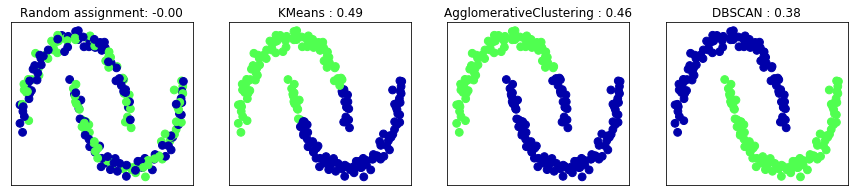

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference:
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment:
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: %.2f" % silhouette_score(X_scaled, random_clusters))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
 clusters = algorithm.fit_predict(X_scaled)
 # plot the cluster assignments and cluster centers
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
 ax.set_title("%s : %.2f" % (algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

# Requirements of homework for Chapter 3

1、Use the handwritten digits dataset to do clustering.

2、Use KMeams, Agglomerative, DBSCAN, respectively.

3、Print out 5 images of each cluster.

4、Try to finish as soon as possible. The deadline is April 10th. (Late submmision is accepted but with low grade)

In [78]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [79]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [80]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	9.128s	69485	0.613	0.660	0.636	0.482	0.632	0.165
random   	0.196s	69952	0.545	0.616	0.578	0.415	0.574	0.145
PCA-based	0.107s	72686	0.636	0.658	0.647	0.521	0.643	0.154
__________________________________________________________________________________


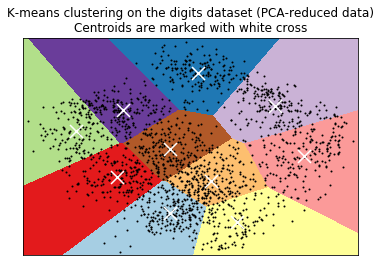

In [77]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [81]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import pandas as pd
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
# Fit K-Means
kmeans_1 = KMeans(n_clusters=4,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(cluster_df)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(cluster_df, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_df, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_df, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.4924
Calinski Harabasz Score: 166.0910
Davies Bouldin Score: 0.3228


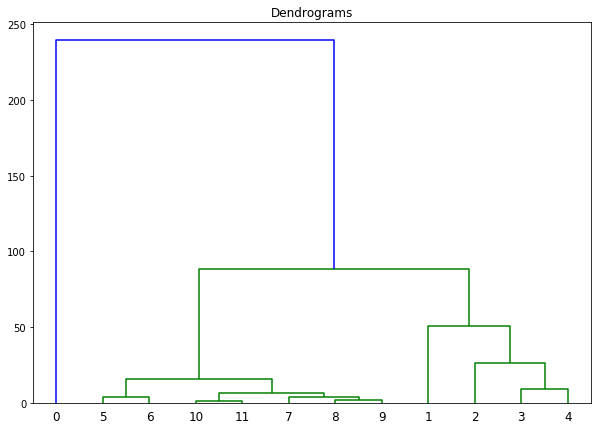

In [82]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cluster_df, method='ward'))

75.2483844449786


<Figure size 360x360 with 0 Axes>

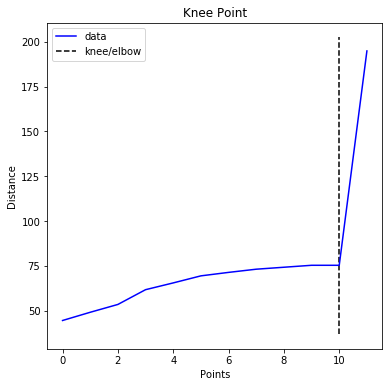

In [83]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(cluster_df)
distances, indices = neighbors.kneighbors(cluster_df)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

In [84]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=1.9335816413107338, min_samples= 2)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(cluster_df, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(cluster_df, yhat)
score_dbsacn_d = davies_bouldin_score(cluster_df, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: -0.0713
Calinski Harabasz Score: 1.4557
Davies Bouldin Score: 0.9555
